In [15]:
import matplotlib.pyplot as plt
import numpy as np
from util.functions import get_data_ticker, dias_uteis_entre_datas, decompor_sinal
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

EMPRESA = 'ITUB4.SA'

## Obter dados

In [16]:
dados = get_data_ticker(EMPRESA, period='5y')
dados.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [17]:
from sklearn.model_selection import train_test_split

trend = decompor_sinal(dados['Close'], period=120).trend.dropna()
train_trend, test_trend = trend[:int(len(trend)*0.8)], trend[int(len(trend)*0.8):]

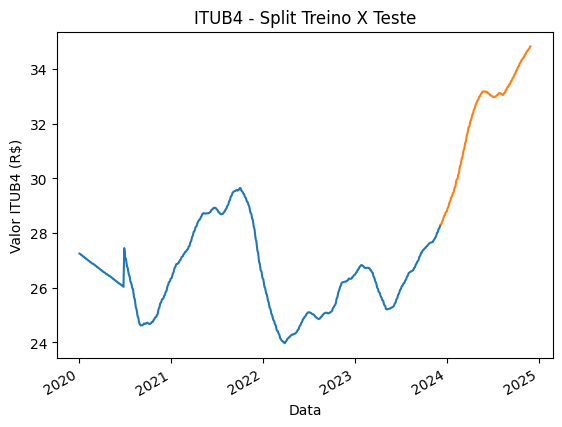

<Figure size 1400x500 with 0 Axes>

In [18]:
train_trend.plot()
test_trend.plot()
plt.xlabel('Data')
plt.ylabel('Valor ITUB4 (R$)')
plt.title('ITUB4 - Split Treino X Teste')
plt.figure(figsize=(14, 5))
plt.show()

In [19]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

order = auto_arima(train_trend, seasonal=False).order
model = ARIMA(train_trend, order=order)
model_fit = model.fit()

/home/nikolas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/nikolas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/nikolas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


/home/nikolas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/nikolas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


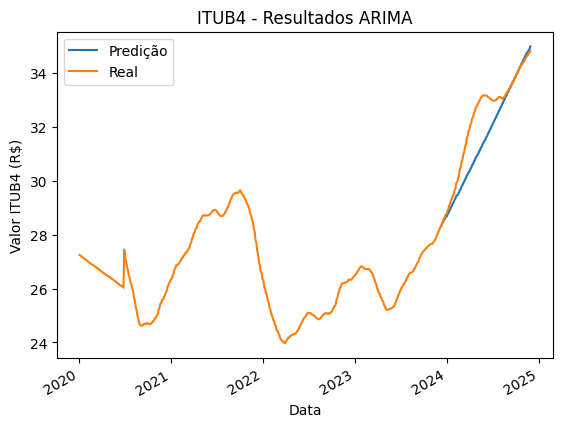

<Figure size 1400x500 with 0 Axes>

In [20]:
import pandas as pd
arima_result = model_fit.get_forecast(steps=len(test_trend) or 100)
arima_result = pd.Series(list(arima_result.predicted_mean), index=test_trend.index if len(test_trend) else range(len(train_trend), len(train_trend)+100))
arima_result.plot()
if test_trend.empty:
    trend.index = range(len(train_trend))
trend.plot()
plt.xlabel('Data')
plt.ylabel('Valor ITUB4 (R$)')
plt.legend(['Predição', 'Real'])
plt.title('ITUB4 - Resultados ARIMA')
plt.figure(figsize=(14, 5))
plt.show()

In [29]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


def avaliar_modelo(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, r2, np.sqrt(mse)

avaliar_modelo(test_trend, arima_result)

(0.909579508424944, 0.6780295320610115, 0.7165288302990389, 0.9537187784797697)

/home/nikolas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/nikolas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


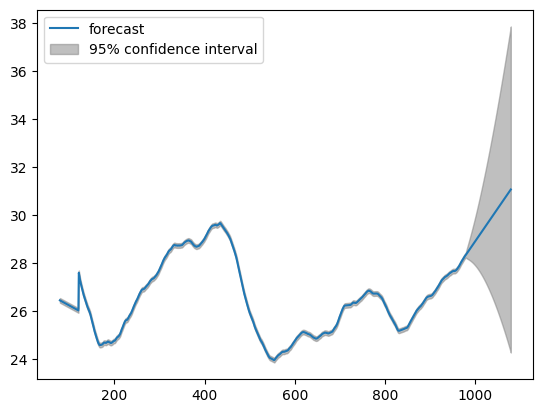

<Figure size 1400x500 with 0 Axes>

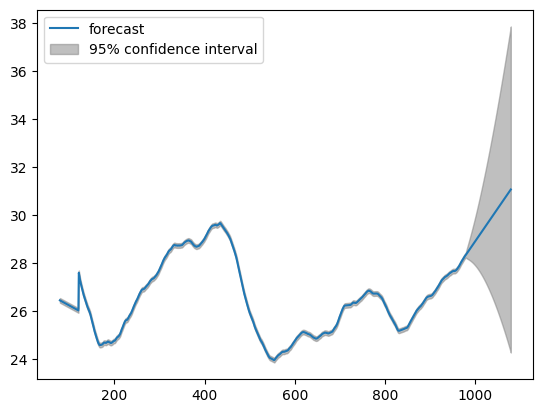

In [21]:
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima.model import ARIMA

# Obtendo o número total de observações
n_obs = len(train_trend)
plt.figure(figsize=(14, 5))
# Plotando a previsão com índices numéricos
plot_predict(model_fit, start=n_obs-900, end=n_obs + 100)

In [22]:
arima_result.index[0]

Timestamp('2023-12-11 00:00:00')

In [23]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

import pmdarima as pm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_predict

In [24]:
df_diff = dados[['Close']].diff().dropna()

In [25]:
lag_acf = acf(df_diff.dropna(), nlags=25)
lag_pacf = pacf(df_diff.dropna(), nlags=25)

<Figure size 1400x500 with 0 Axes>

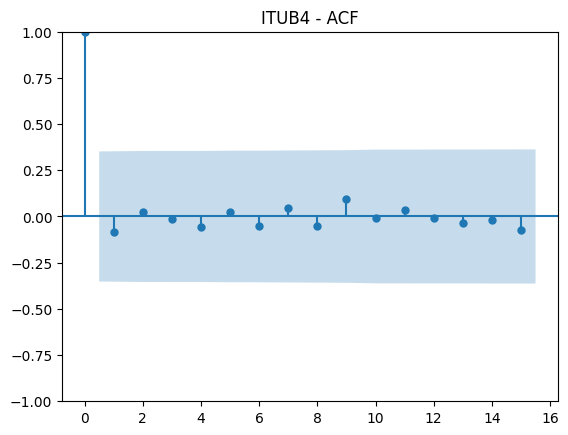

In [26]:
lag_acf = acf(df_diff)
lag_pacf = pacf(df_diff)
plt.figure(figsize=(14, 5))
plot_acf(lag_acf, title='ITUB4 - ACF')
plt.show()


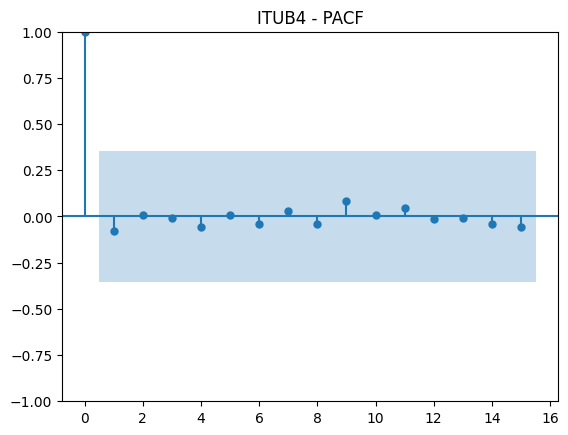

In [27]:
plot_pacf(lag_pacf, title='ITUB4 - PACF')
plt.show()